# TSF - Graduate Rotational Internship Program (Oct '21)

## Data Science and Business Analytics Internship

### Name: Janhavi Pimplikar

### Task 1 - Prediction using Supervised ML

### Predicting the percentage of a student based on the number of study hours

This task will give an insight into how linear regression can be applied to bivariate data. In this task, we will be given a dataset containing the hours studied and marks scored by a student in an exam. We will use linear regression to predict the marks which would be obtained by the student, based on the number of hours spent studying.

### Step 1: Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Step 2: Accessing and exploring the data

In [2]:
dataset = "http://bit.ly/w-data"
data = pd.read_csv(dataset)

In [3]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


From the above table we observe that:
1. maximum study hours :  **9.2**
2. minimum study hours: **1.1** 
3. mean study hours: **5.01**
4. mean score: **51.4**

Text(0.5, 0, 'Hours')

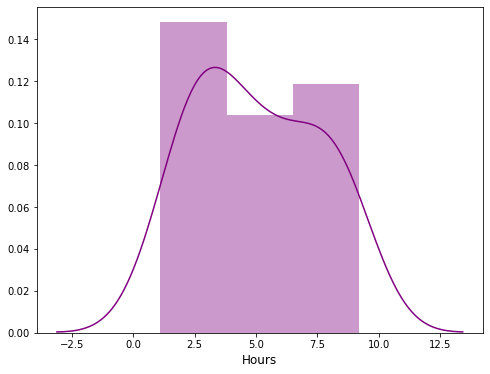

In [6]:
fig,ax=plt.subplots(figsize=(8,6))
g=sns.distplot(data['Hours'],color='purple',kde= True,ax=ax)
plt.xlabel("Hours", size = 12)

Text(0.5, 0, 'Scores')

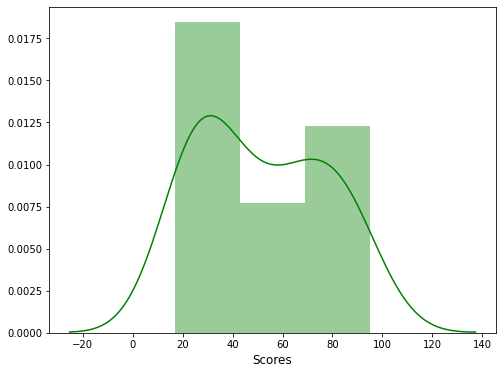

In [7]:
fig,ax=plt.subplots(figsize=(8,6))
g=sns.distplot(data['Scores'],color='green',kde= True,ax=ax)
plt.xlabel("Scores", size = 12)

**After exploring the data, we can try to find a relation between the two variables; 'Hours' and 'Scores'.
For this, we can use a linear plot to map the values.**

Text(0, 0.5, 'Score obtained')

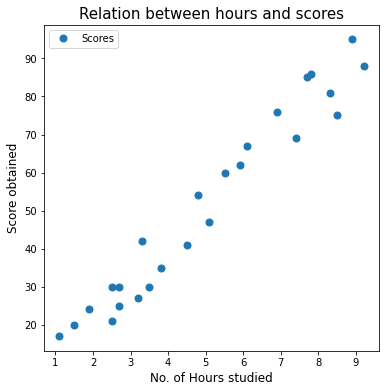

In [8]:
data.plot(x = "Hours", y = "Scores", figsize = (6,6), style = "o", markersize = 7)
plt.title("Relation between hours and scores", size = 15)
plt.xlabel("No. of Hours studied", size = 12)
plt.ylabel("Score obtained", size = 12)

**From the above graph, it is observed that there is a positive correlation between the number of hours studied and the number
of marks obtained by the student. As the number of hours increase, the scores increase as well.**

### Step 3: Training the model

In order to train the model, we will need to split the data into attributes and labels, which will serve as input and output respectively. We will also have to split our data into two: one part for training and another part for testing 
the data using supervised learning.

In [9]:
X_val = data.iloc[:, :1].values #separating the X values (Hours)
Y_val = data.iloc[:, 1:].values #separating the Y values(Scores)

In [10]:
X_val

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [11]:
Y_val

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_val, Y_val, test_size = 0.2, random_state = 0)

In [13]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, Y_train)

LinearRegression()

**The model has been successfully trained using the training dataset. Now we can plot the trained data.**

In [14]:
# regression line form: y = mx + c
# where m =regression coefficient 
# where x = X_val
# where c = regression intercept

m = reg.coef_
c = reg.intercept_
y = (m * X_val) + c

Text(0.5, 1.0, 'Linear Regression Line')

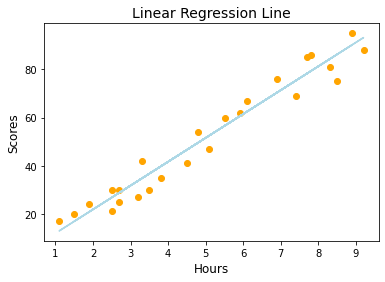

In [15]:
plt.scatter(X_val, Y_val, color = "orange")
plt.plot(X_val, y, color = "lightblue");
plt.xlabel("Hours", size = 12)
plt.ylabel("Scores", size = 12)
plt.title("Linear Regression Line", size = 14)

**We can infer that the regression line shows a positive slope and a steady increment.**

### Step 4: Making predictions from the trained model

In [16]:
print(X_test)
Y_predicted = reg.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [17]:
Y_predicted

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [21]:
Y_test

array([[20],
       [27],
       [69],
       [30],
       [62]], dtype=int64)

From the above regression model, we observe that the **obtained values** are **different** from that of the **given values**, for the same hours.

### Step 5: Prediction for 9.25 hours 

In [19]:
hr = 9.25
own_pred = reg.predict([[hr]])
print("The number of hours: ", hr)
print("Predicted Score: ", own_pred[0])

The number of hours:  9.25
Predicted Score:  [93.69173249]
